# Homework 1
DASC 512  
Richy Peterson


### Problem 1: 25 points  
*The Meaning of Life*  
In 2021, Pew Research Center conducted a survey of 2,596 adults in the United States.
They asked ”What aspects of your life do you currently find meaningful, fulfilling, or satisfying?” They
did not report raw data, but below is a generated dataset based on reported results.  

Topic | Frequency
-------| ----------
Family | 716  
Friends | 300  
Material Well-being | 265  
Career | 262  
Challenges | 285  
Spirituality | 250  
Society | 210  
Health | 172  
Hobbies | 136  

(a) Compute the Relative Frequencies for each response category.  
(b) Construct a bar graph of the Relative Frequencies.  
(c) Interpret the data in a paragraph (2 or more sentences).  

In [1]:
# (a) Compute the Relative Frequencies for each response category.  
import pandas as pd

In [2]:
topics = ['Family', 'Friends','Material Well-being','Career','Challenges','Spirituality','Society', 'Health','Hobbies']
frequency = [716, 300, 265, 262, 285, 250, 210, 172, 136]

df = pd.DataFrame({'Topic': topics, 'Frequency': frequency})
df['Relative_Frequency'] = df['Frequency'] / df['Frequency'].sum()
df.style.hide()

Topic,Frequency,Relative_Frequency
Family,716,0.275809
Friends,300,0.115562
Material Well-being,265,0.102080
Career,262,0.100924
Challenges,285,0.109784
Spirituality,250,0.096302
Society,210,0.080894
Health,172,0.066256
Hobbies,136,0.052388


In [3]:
print(df.to_latex(index=False,float_format="%.3f"))

\begin{tabular}{lrr}
\toprule
Topic & Frequency & Relative_Frequency \\
\midrule
Family & 716 & 0.276 \\
Friends & 300 & 0.116 \\
Material Well-being & 265 & 0.102 \\
Career & 262 & 0.101 \\
Challenges & 285 & 0.110 \\
Spirituality & 250 & 0.096 \\
Society & 210 & 0.081 \\
Health & 172 & 0.066 \\
Hobbies & 136 & 0.052 \\
\bottomrule
\end{tabular}



(b)   
Construct a bar graph of the Relative Frequencies.  

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

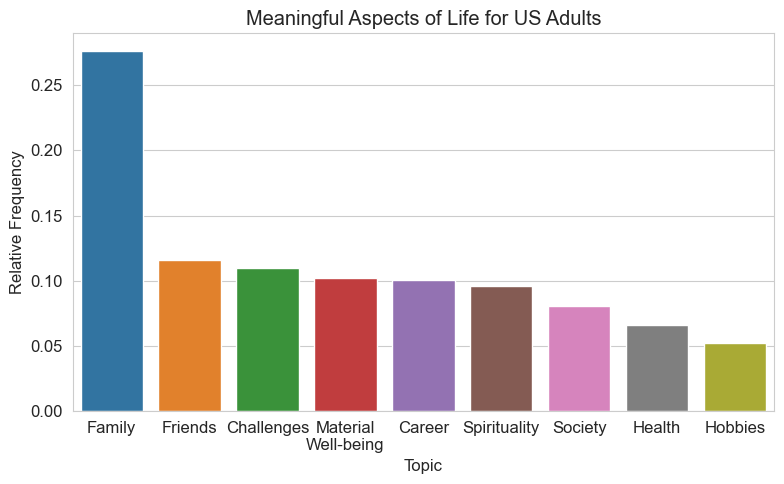

In [5]:
plt.rc('font',size=12)
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=df,x='Topic',y='Relative_Frequency',ax=ax, order=df.sort_values('Relative_Frequency',ascending=False)['Topic'])
ax.set_ylabel('Relative Frequency')
xtick_labels = df.sort_values('Relative_Frequency',ascending=False)['Topic']
xtick_labels = [topic.replace(' ','\n') for topic in xtick_labels]
ax.set_xticks(ax.get_xticks(), labels=xtick_labels)
ax.set_title('Meaningful Aspects of Life for US Adults')
fig.tight_layout()
fig.savefig('hw1-1b-bargraph.png')

(c)   
Interpret the data in a paragraph (2 or more sentences).  


First I want to point out some observations and assumptions because I don't know the details of the data or how it was collected. The total frequency count is 2,596. Since this is the same as the number of adults surveyed, it could be what their first response was (the first thing that came to mind), or what they considered the most meaningful, fulfilling, or satisfying. I will assume the latter. With this assumption, US adults indicated that family was the most meaningful aspect of their life more than twice as often as any other aspect. Friends is the next most frequent, but it is very close with several other aspects. Both the friends and family aspects could be considered relationships with others. Combining those two gives a relative frequency of over one-third, indicating that most frequently, US adults find meaning in life from those close to them.

---

### Problem 2: 25 points  
*Board Game Weights*  
The file `bgg.csv` on Canvas contains a database of every board game on the popular site “Board
Game Geek.” These data can be used to answer the following questions.  

(a)  
The column `averageweight` gives the average user assessment of the “weight” (i.e., complexity) of each
game. Games with a value of 0 have not been rated and should not be included in any of the following
analysis.  
Create a table of summary statistics for the average weight of games. This table should include
the Minimum, 1st Quartile, Median, Mean, 3rd Quartile, Maximum, Sample Variance, and Sample
Standard Deviation (note the use of the word ‘Sample’ even though this is arguably a census).  

(b)   
Create Box Plots for the average weight of games by whether it is ranked as a Family Game or not.
If `Family Game Rank` is blank (coded as `NaN`), then it is not ranked as a Family Game. I recommend
adding a new column using the function `np.isnan`.  
Are family games more or less complex? What can you say about the relative complexity of family
games and non-family games?  

(c)  
 Create a `scatterplot` of weight to average rating (average). What can you say about this relationship?  

In [6]:
df = pd.read_csv('bgg.csv')
df

,primary,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,...,Family Game Rank,stddev,median,owned,trading,wanting,wishing,numcomments,numweights,averageweight
0,Pandemic,2008,2,4,45,45,45,8,96241,7.61567,...,10.0,1.32632,0,144727,2191,640,8571,15778,5232,2.4148
1,Carcassonne,2000,2,5,45,30,45,7,96228,7.41884,...,34.0,1.30369,0,140066,1587,539,6286,17720,7304,1.9158
2,Catan,1995,3,4,120,60,120,10,96213,7.16265,...,108.0,1.47908,0,144656,1825,474,5310,17859,7187,2.3264
3,7 Wonders,2010,2,7,30,30,30,10,79873,7.76049,...,6.0,1.27618,0,106137,1393,1044,10875,13304,4423,2.3321
4,Dominion,2008,2,4,30,30,30,13,74959,7.62671,...,NaN,1.42504,0,97736,1897,637,7607,13008,4850,2.3586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,Ninja Rush,2018,2,4,0,0,0,7,30,5.08333,...,NaN,2.01694,0,36,1,0,4,4,1,1.0000
19226,Politricks: Dirty Card Game,2016,2,5,30,15,30,10,30,6.71667,...,NaN,1.91348,0,78,0,0,1,13,2,2.0000
19227,Doppel X,2017,3,8,20,20,20,8,30,5.16667,...,NaN,1.52388,0,53,3,0,6,10,1,1.0000
19228,Beasty Borders,2019,2,2,25,15,25,8,30,6.20333,...,NaN,1.37804,0,87,2,6,23,18,0,0.0000


(a)  
The column `averageweight` gives the average user assessment of the “weight” (i.e., complexity) of each
game. Games with a value of 0 have not been rated and should not be included in any of the following
analysis.  
Create a table of summary statistics for the average weight of games. This table should include
the Minimum, 1st Quartile, Median, Mean, 3rd Quartile, Maximum, Sample Variance, and Sample
Standard Deviation (note the use of the word ‘Sample’ even though this is arguably a census).  

In [7]:
df_rated = df[df['averageweight']!=0].copy()
avgweight = df_rated['averageweight']
# avgweight = avgweight[avgweight!=0]

In [8]:
# Minimum, 1st Quartile, Median, Mean, 3rd Quartile, Maximum, Sample Variance, and Sample Standard Deviation
aw_min = avgweight.min()
aw_max = avgweight.max()
aw_med = avgweight.median()
aw_mean = avgweight.mean()
aw_var = avgweight.var()
aw_std = avgweight.std()
aw_1qrt = avgweight.quantile(.25)
aw_3qrt = avgweight.quantile(.75)


In [9]:
avgweight_sum_stats_dict = {'Minimum':aw_min, '1st Quartile':aw_1qrt, 'Median':aw_med, 'Mean':aw_mean, '3rd Quartile':aw_3qrt, 'Maximum':aw_max, 'Variance':aw_var, 'Standard Deviation':aw_std}
avgweight_sum_stats = pd.Series(avgweight_sum_stats_dict,name='Summary Statistics')
avgweight_sum_stats

Minimum               1.000000
1st Quartile          1.341500
Median                2.000000
Mean                  2.037925
3rd Quartile          2.571400
Maximum               5.000000
Variance              0.650203
Standard Deviation    0.806351
Name: Summary Statistics, dtype: float64

In [10]:
# format for latex table
print(avgweight_sum_stats.to_latex(float_format="%.3f"))

\begin{tabular}{lr}
\toprule
 & Summary Statistics \\
\midrule
Minimum & 1.000 \\
1st Quartile & 1.341 \\
Median & 2.000 \\
Mean & 2.038 \\
3rd Quartile & 2.571 \\
Maximum & 5.000 \\
Variance & 0.650 \\
Standard Deviation & 0.806 \\
\bottomrule
\end{tabular}



<Axes: >

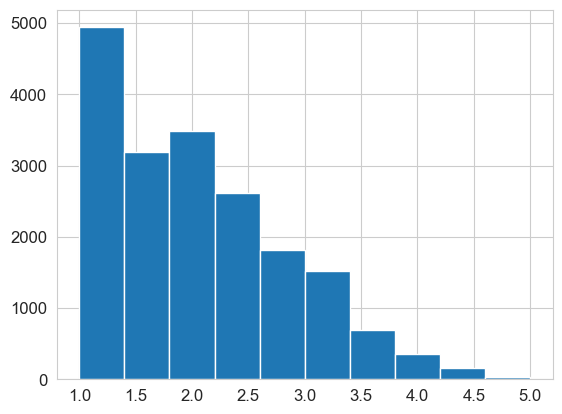

In [11]:
avgweight.hist()

(b)   
Create Box Plots for the average weight of games by whether it is ranked as a Family Game or not.
If `Family Game Rank` is blank (coded as `NaN`), then it is not ranked as a Family Game. I recommend
adding a new column using the function `np.isnan`.  
Are family games more or less complex? What can you say about the relative complexity of family
games and non-family games?  

In [12]:
import numpy as np

In [13]:
df_rated['Is_Family_Game'] = df_rated['Family Game Rank'].isna().map({True:'No',False:'Yes'})

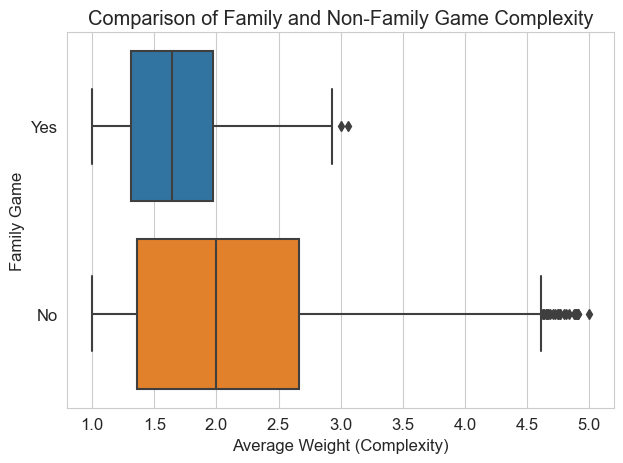

In [14]:
fig, ax = plt.subplots()
sns.boxplot(data=df_rated, x='averageweight', y='Is_Family_Game', ax=ax)
ax.set_xlabel('Average Weight (Complexity)')
ax.set_ylabel('Family Game')
ax.set_title('Comparison of Family and Non-Family Game Complexity')
fig.tight_layout()
fig.savefig('hw1-2b-boxplot-avgwt.png')

Family games are typically less complex than non-family games. 

(c)  
 Create a `scatterplot` of weight to average rating (average). What can you say about this relationship?  

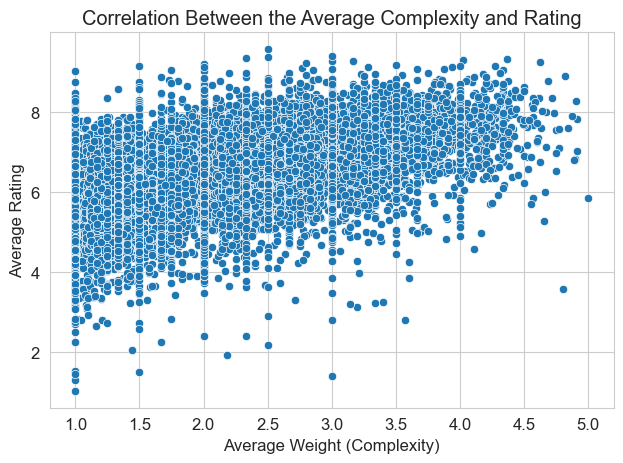

In [15]:
fig,ax = plt.subplots()
sns.scatterplot(data=df_rated, x='averageweight', y='average', ax=ax)
ax.set_xlabel('Average Weight (Complexity)')
ax.set_ylabel('Average Rating')
ax.set_title('Correlation Between the Average Complexity and Rating')
fig.tight_layout()
fig.savefig('hw1-2c-scatter-avwt_rating.png')


There is a slight positive correlation between the average weight and the average rating. Most noticeably is that the more complex games tend to receive much fewer lower (below 6) ratings.

---

### Problem 3: 50 points  
*Baseball Hall-of-Famers*  
Baseball Hall-of-Famers (HoF) played during different eras of baseball. One common classification
of eras is ‘19th Century’ (up to the 1900 season), ‘Dead Ball’ (1901–1919), ‘Lively Ball’ (1920–1941),
‘Integration’ (1942–1960), ‘Expansion’ (1961–1976), ‘Free Agency’ (1977–1993), and ‘Long Ball’ (after
1993). For this exercise, define the era of a player based on the mid-point of their career (rounding up
if necessary).  
Using the file `hofbatting.csv`, containing non-pitching HoFs as of 2013, classify each player according
to their era to answer the following questions.  



(a)   
Create a Bar Graph for the number of HoFs from each era as of 2013. Interpret the data.  
You will need to take multiple steps to solve this problem.  
- Import the CSV.  
- Create a column of data to define the mid-career.  
- Find a way to count the number of HoFs in each era by the mid-career column.  
- Create the graphs.  
- Provide a written interpretation of the data.  



In [16]:
hof = pd.read_csv('hofbatting.csv')
hof.head()

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS
0,1,Hank Aaron HOF,1982,23,1954,1976,25,137.3,3298,13941,...,755,2297,240,73.0,1402,1383,0.305,0.374,0.555,0.928
1,3,Roberto Alomar HOF,2011,17,1988,2004,12,62.9,2379,10400,...,210,1134,474,114.0,1032,1140,0.300,0.371,0.443,0.814
2,6,Cap Anson HOF,1939,27,1871,1897,0,91.1,2524,11331,...,97,2075,277,16.0,984,330,0.334,0.394,0.447,0.841
3,7,Luis Aparicio HOF,1984,18,1956,1973,13,51.7,2599,11230,...,83,791,506,136.0,736,742,0.262,0.311,0.343,0.653
4,8,Luke Appling HOF,1964,20,1930,1950,7,69.9,2422,10254,...,45,1116,179,108.0,1302,528,0.310,0.399,0.398,0.798


In [17]:
import math

hof['mid-career'] = np.ceil((hof['To'] - hof['From']) / 2 + hof['From']).astype(int)
hof.head()

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,mid-career
0,1,Hank Aaron HOF,1982,23,1954,1976,25,137.3,3298,13941,...,2297,240,73.0,1402,1383,0.305,0.374,0.555,0.928,1965
1,3,Roberto Alomar HOF,2011,17,1988,2004,12,62.9,2379,10400,...,1134,474,114.0,1032,1140,0.300,0.371,0.443,0.814,1996
2,6,Cap Anson HOF,1939,27,1871,1897,0,91.1,2524,11331,...,2075,277,16.0,984,330,0.334,0.394,0.447,0.841,1884
3,7,Luis Aparicio HOF,1984,18,1956,1973,13,51.7,2599,11230,...,791,506,136.0,736,742,0.262,0.311,0.343,0.653,1965
4,8,Luke Appling HOF,1964,20,1930,1950,7,69.9,2422,10254,...,1116,179,108.0,1302,528,0.310,0.399,0.398,0.798,1940


In [18]:
def map_era(year:int) -> str:
    '''
    Map the career mid-year to an era
    '''
    if year <= 1900:
        era = '19th Century'
    elif year >= 1901 and year <= 1919:
        era = 'Dead Ball'
    elif year >= 1920 and year <= 1941:
        era = 'Lively Ball'
    elif year >= 1942 and year <= 1960:
        era = 'Integration'
    elif year >= 1961 and year <= 1976:
        era = 'Expansion'
    elif year >= 1977 and year <= 1993:
        era = 'Free Agency'
    elif year > 1993:
        era = 'Long Ball'
    return era

In [19]:
hof['era'] = hof['mid-career'].map(map_era)

In [20]:
hof.head()

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,SB,CS,BB,SO,BA,OBP,SLG,OPS,mid-career,era
0,1,Hank Aaron HOF,1982,23,1954,1976,25,137.3,3298,13941,...,240,73.0,1402,1383,0.305,0.374,0.555,0.928,1965,Expansion
1,3,Roberto Alomar HOF,2011,17,1988,2004,12,62.9,2379,10400,...,474,114.0,1032,1140,0.300,0.371,0.443,0.814,1996,Long Ball
2,6,Cap Anson HOF,1939,27,1871,1897,0,91.1,2524,11331,...,277,16.0,984,330,0.334,0.394,0.447,0.841,1884,19th Century
3,7,Luis Aparicio HOF,1984,18,1956,1973,13,51.7,2599,11230,...,506,136.0,736,742,0.262,0.311,0.343,0.653,1965,Expansion
4,8,Luke Appling HOF,1964,20,1930,1950,7,69.9,2422,10254,...,179,108.0,1302,528,0.310,0.399,0.398,0.798,1940,Lively Ball


In [21]:
eras = hof['era']
bins = np.array(eras.value_counts().index)
counts = eras.value_counts().values

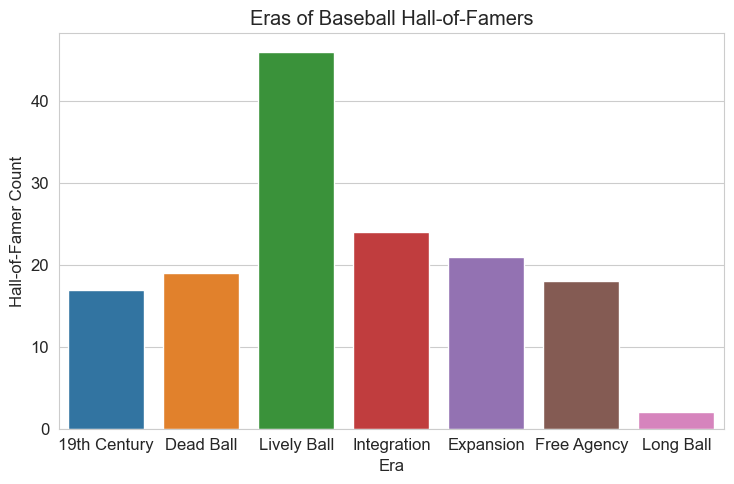

In [22]:
era_order = ['19th Century', 'Dead Ball', 'Lively Ball','Integration', 'Expansion','Free Agency','Long Ball']
fig, ax = plt.subplots(figsize=(7.5,5))
sns.barplot(x=bins, y=counts, ax=ax, order=era_order)
ax.set_title('Eras of Baseball Hall-of-Famers')
ax.set_xlabel('Era')
ax.set_ylabel('Hall-of-Famer Count')
fig.tight_layout()
fig.savefig('hw1-3a-hof_eras.png')

I assume that the low number for the 'Long Ball' ball era is due to a waiting time from when a player is eligible for HOF consideration (the data is from 2013). The 'Lively Ball' era has nearly twice as many non-pitching HOFs than any other era. At 21 years it is the longest era, other than the 19th Century era. The other eras are between 15-18 years, which would still make the 'Lively Ball' era the highest if considered on a per year basis. 

(b)   
Create a histogram showing the distribution of non-pitching HoFs’ Mid-Career year.  

In [23]:
from matplotlib.ticker import MaxNLocator


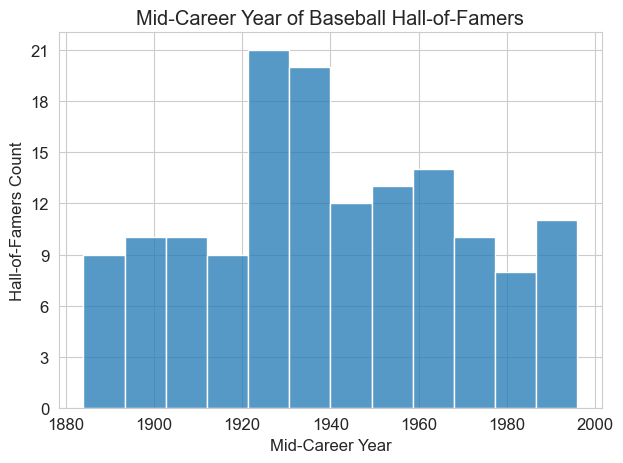

In [24]:
fig,ax = plt.subplots()
sns.histplot(data=hof,x='mid-career',ax=ax,bins=12)
ax.set_title('Mid-Career Year of Baseball Hall-of-Famers')
ax.set_xlabel('Mid-Career Year')
ax.set_ylabel('Hall-of-Famers Count')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig('hw1-3b-hist-hof-midcareer_year.png')

(c)   
There are two major dimensions to hitting: the ability to get on base (measured by the on-base percentage
OBP) and the ability to advance runners already on base (measured by the slugging percentage
SLG). Create a `scatterplot` of OBP vs. SLG. Are there any outliers? If so, identify them by name. Is
there a relationship between OBP and SLG?  

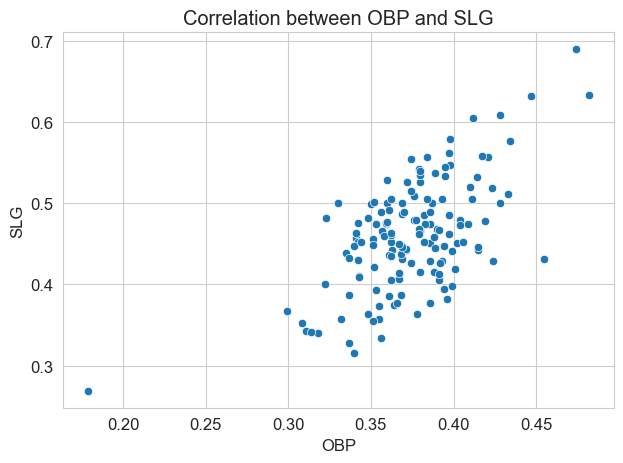

In [25]:
fig,ax = plt.subplots()
sns.scatterplot(data=hof, x='OBP', y='SLG', ax=ax)
ax.set_title('Correlation between OBP and SLG')
fig.tight_layout()
fig.savefig('hw1-3c-scatter-OBP_SLG.png')

There is a positive relationship between OBP and SLG. There is an obvious outlier with the data point with the lowest OBP and SLG. Another point that could be considered an outlier is the one with OBP greater than 0.45 but a SLG less than 0.5. This one is not that far from the spread of the data though so I would not consider it an outlier without more analysis. 

In [26]:
# an outlier that doesn't fit the trend of the rest of the data
hof[hof['OBP']<0.2]

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,SB,CS,BB,SO,BA,OBP,SLG,OPS,mid-career,era
20,27,Willard Brown HOF,2006,1,1947,1947,0,-0.7,21,67,...,2,2.0,0,7,0.179,0.179,0.269,0.448,1947,Integration


In [27]:
# the other possible outlier
hof[(hof['OBP']>0.45) & (hof['SLG']<0.5)]

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,SB,CS,BB,SO,BA,OBP,SLG,OPS,mid-career,era
62,93,Billy Hamilton HOF,1961,14,1888,1901,0,61.1,1594,7608,...,914,NaN,1189,349,0.344,0.455,0.432,0.888,1895,19th Century


(d)   
Consider a combined metric for hitting, the On-base Plus Slugging (OPS) statistic, which is the sum of
OBP and SLG. Normalize this data (i.e., calculate the z-scores), then create a `scatterplot` with OPS
on the y-axis and Mid-Career Year on the x-axis. Identify any outliers by name. Do you notice any
patterns in the scatterplot of the data? What can you say (if anything) about the cause of any pattern?  

In [28]:
hof['OPS_norm'] = (hof['OPS'] - hof['OPS'].mean()) / hof['OPS'].std()

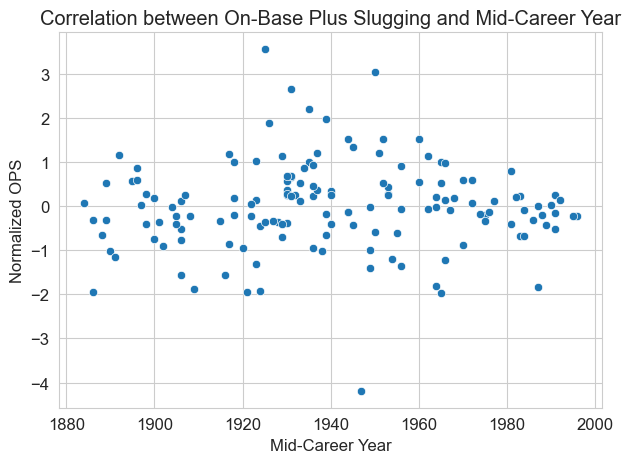

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(data=hof, y='OPS_norm', x='mid-career', ax=ax)
ax.set_title('Correlation between On-Base Plus Slugging and Mid-Career Year')
ax.set_ylabel('Normalized OPS')
ax.set_xlabel('Mid-Career Year')
fig.tight_layout()
fig.savefig('hw1-3d-scatter-normOPS.png')

No noticable pattern. The OPS is distributed similarily throughout the years.

Outliers:
OPS_norm < -3 and OPS_norm > 3


In [30]:
hof[(hof['OPS_norm']<-3) | (hof['OPS_norm']>3)]

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,CS,BB,SO,BA,OBP,SLG,OPS,mid-career,era,OPS_norm
20,27,Willard Brown HOF,2006,1,1947,1947,0,-0.7,21,67,...,2.0,0,7,0.179,0.179,0.269,0.448,1947,Integration,-4.183964
115,184,Babe Ruth HOF,1936,22,1914,1935,2,159.2,2503,10620,...,117.0,2062,1330,0.342,0.474,0.690,1.164,1925,Lively Ball,3.560994
141,224,Ted Williams HOF,1966,19,1939,1960,19,119.8,2292,9788,...,17.0,2021,709,0.344,0.482,0.634,1.116,1950,Integration,3.041779


(e)   
Create a Box Plot for the Home-Run RatestdRR), defined as home-runs per at-bat (HR/AB), of HoFs
during each era (i.e., you should have 7 box-plots). Also calculate descriptive statistics of HRR including
Min, Q1, Median, Q3, Max, Mean, Range, and Sample Standard Deviation for each era. Provide a table
of these values from the Expansion era only (to limit time spent copying and pasting from Python).

In [31]:
hof['HRR'] = hof['HR'] / hof['AB']

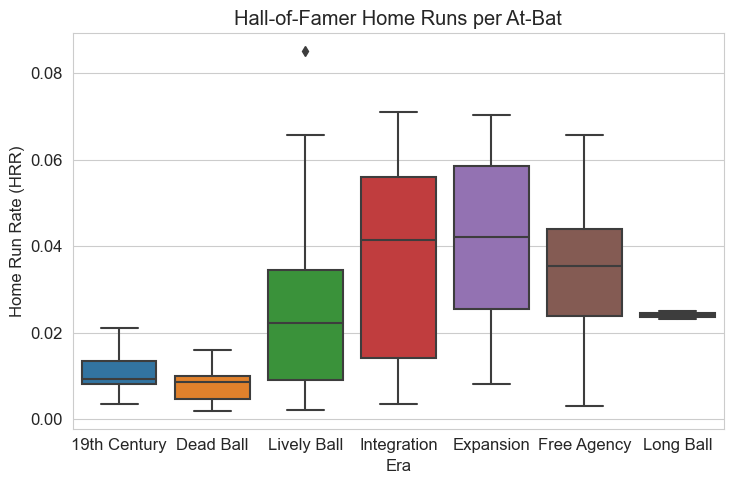

In [32]:
fig, ax = plt.subplots(figsize=(7.5,5))
sns.boxplot(data=hof, y='HRR', x='era', ax=ax, order=era_order)
ax.set_title('Hall-of-Famer Home Runs per At-Bat')
ax.set_ylabel('Home Run Rate (HRR)')
ax.set_xlabel('Era')
fig.tight_layout()
fig.savefig('hw1-3e-HRR.png')

In [33]:
# curious who is the highest HRR
hof[hof['HRR']>0.08]

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,BB,SO,BA,OBP,SLG,OPS,mid-career,era,OPS_norm,HRR
115,184,Babe Ruth HOF,1936,22,1914,1935,2,159.2,2503,10620,...,2062,1330,0.342,0.474,0.69,1.164,1925,Lively Ball,3.560994,0.08501


In [34]:
# calculate HRR descriptive statistics table
# add table for Expansion era

In [35]:
hrr_desc_stats = pd.DataFrame(index=era_order,columns=['Min','Q1','Median','Q3','Max','Mean','Range','Sample Standard Deviation'])

In [36]:
hrr_desc_stats['Min'] = [hof[hof['era']==era]['HRR'].min() for era in hrr_desc_stats.index]
hrr_desc_stats['Q1'] = [hof[hof['era']==era]['HRR'].quantile(0.25) for era in hrr_desc_stats.index]
hrr_desc_stats['Median'] = [hof[hof['era']==era]['HRR'].median() for era in hrr_desc_stats.index]
hrr_desc_stats['Q3'] = [hof[hof['era']==era]['HRR'].quantile(0.75) for era in hrr_desc_stats.index]
hrr_desc_stats['Max'] = [hof[hof['era']==era]['HRR'].max() for era in hrr_desc_stats.index]
hrr_desc_stats['Mean'] = [hof[hof['era']==era]['HRR'].mean() for era in hrr_desc_stats.index]
hrr_desc_stats['Range'] = hrr_desc_stats['Max'] - hrr_desc_stats['Min']
hrr_desc_stats['Sample Standard Deviation'] = [hof[hof['era']==era]['HRR'].std() for era in hrr_desc_stats.index]


In [37]:
hrr_desc_stats

,Min,Q1,Median,Q3,Max,Mean,Range,Sample Standard Deviation
19th Century,0.003396,0.008071,0.009278,0.013447,0.021007,0.010869,0.017611,0.004594
Dead Ball,0.001955,0.004688,0.008537,0.009906,0.016043,0.007816,0.014087,0.003800
Lively Ball,0.002073,0.009117,0.022306,0.034400,0.085010,0.024583,0.082937,0.019393
Integration,0.003467,0.014104,0.041454,0.055998,0.070893,0.036149,0.067427,0.022531
Expansion,0.008113,0.025386,0.041999,0.058565,0.070333,0.040960,0.062219,0.018871
Free Agency,0.002980,0.023875,0.035472,0.043827,0.065613,0.034199,0.062633,0.015825
Long Ball,0.023146,0.023596,0.024046,0.024496,0.024946,0.024046,0.001801,0.001273


In [38]:
hrr_desc_stats = hrr_desc_stats.transpose()

In [39]:
hrr_desc_stats

,19th Century,Dead Ball,Lively Ball,Integration,Expansion,Free Agency,Long Ball
Min,0.003396,0.001955,0.002073,0.003467,0.008113,0.002980,0.023146
Q1,0.008071,0.004688,0.009117,0.014104,0.025386,0.023875,0.023596
Median,0.009278,0.008537,0.022306,0.041454,0.041999,0.035472,0.024046
Q3,0.013447,0.009906,0.034400,0.055998,0.058565,0.043827,0.024496
Max,0.021007,0.016043,0.085010,0.070893,0.070333,0.065613,0.024946
Mean,0.010869,0.007816,0.024583,0.036149,0.040960,0.034199,0.024046
Range,0.017611,0.014087,0.082937,0.067427,0.062219,0.062633,0.001801
Sample Standard Deviation,0.004594,0.003800,0.019393,0.022531,0.018871,0.015825,0.001273


In [40]:

print(hrr_desc_stats['Expansion'].to_latex())

\begin{tabular}{lr}
\toprule
 & Expansion \\
\midrule
Min & 0.008113 \\
Q1 & 0.025386 \\
Median & 0.041999 \\
Q3 & 0.058565 \\
Max & 0.070333 \\
Mean & 0.040960 \\
Range & 0.062219 \\
Sample Standard Deviation & 0.018871 \\
\bottomrule
\end{tabular}

